In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from math import comb
from scipy.stats import ttest_ind

data = pd.read_csv('data/data.csv')
data.head()

,is_stud,group,sex,work_status,fav_year,visit_freq,usd_pred,random_value
0,Нет,13,М,"Да, неполная ставка",1-2,10,3.31,0.56
1,Нет,другая,Ж,"Да, полная ставка",3-4,8,3.30,0.50
2,Нет,другая,М,"Да, неполная ставка",1-2,1,5.00,0.00
3,Да,13,М,"Да, полная ставка",3-4,6,3.20,0.04
4,Да,12,Ж,Нет,3-4,10,2.00,0.98


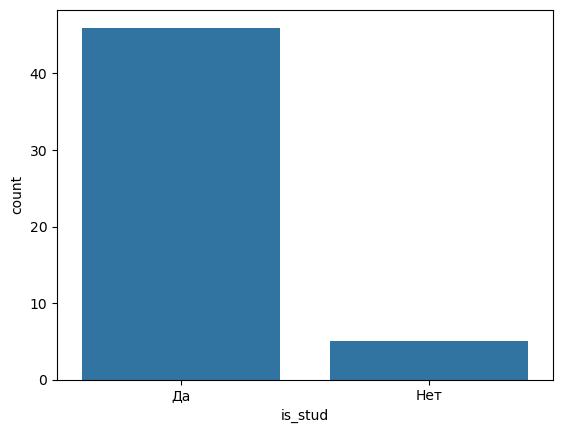

In [79]:
sns.barplot(data['is_stud'].value_counts(), errorbar=None)
plt.show()

In [80]:
data['is_stud'].mode() # Наиболее встречающееся значение

0    Да
Name: is_stud, dtype: object

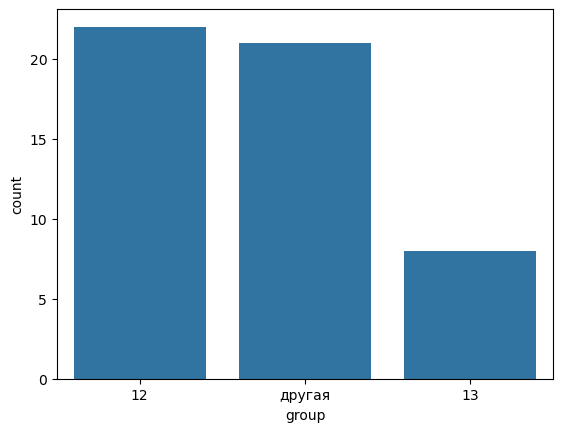

In [81]:
sns.barplot(data['group'].value_counts(), errorbar=None)
plt.show()

In [82]:
data['group'].mode()

0    12
Name: group, dtype: object

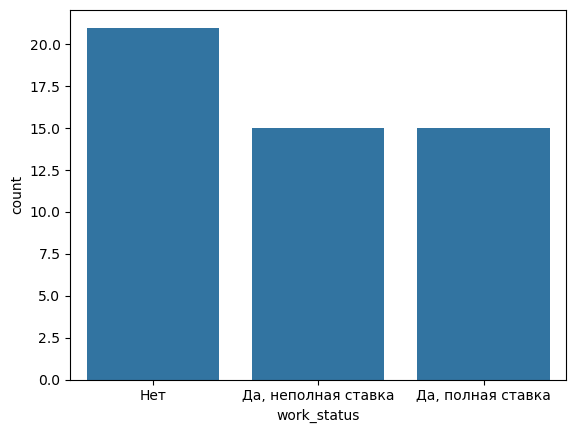

In [83]:
sns.barplot(data['work_status'].value_counts(), errorbar=None)
plt.show()

In [84]:
data['work_status'].mode()

0    Нет
Name: work_status, dtype: object

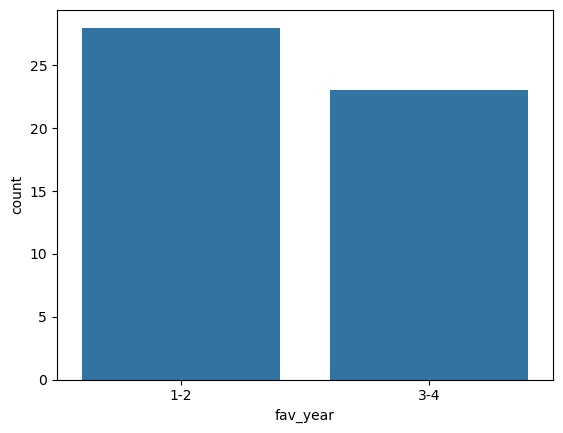

In [85]:
sns.barplot(data['fav_year'].value_counts(), errorbar=None)
plt.show()

In [86]:
data['fav_year'].mode()

0    1-2
Name: fav_year, dtype: object

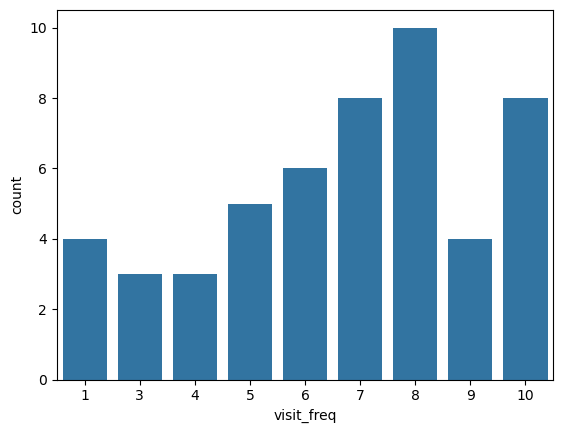

In [87]:
sns.barplot(data['visit_freq'].value_counts(), errorbar=None)
plt.show()

In [88]:
data['visit_freq'].mode()

0    8
Name: visit_freq, dtype: int64

In [89]:
def calc_stat(numerical_features):
    # Вычисляем базовую описательную статистику для числовых признаков
    descriptive_statistics = numerical_features.describe()
    
    # Добавляем медиану в описательную статистику
    descriptive_statistics.loc['median'] = numerical_features.median()
    
    # Добавляем моду (наиболее часто встречающееся значение)
    descriptive_statistics.loc['mode'] = numerical_features.mode().loc[0]
    
    # Вычисляем интерквартильный размах (IQR) и добавляем его
    descriptive_statistics.loc['IQR'] = descriptive_statistics.loc[['75%']].iloc[0] - descriptive_statistics.loc[['25%']].iloc[0]
    
    # Вычисляем асимметрию (skewness) и добавляем ее
    descriptive_statistics.loc['skewness'] = skew(numerical_features, bias=False)
    
    # Вычисляем куртозис (kurtosis) и добавляем его
    descriptive_statistics.loc['kurtosis'] = kurtosis(numerical_features, bias=False)
    
    # Возвращаем итоговую таблицу с описательной статистикой
    return descriptive_statistics

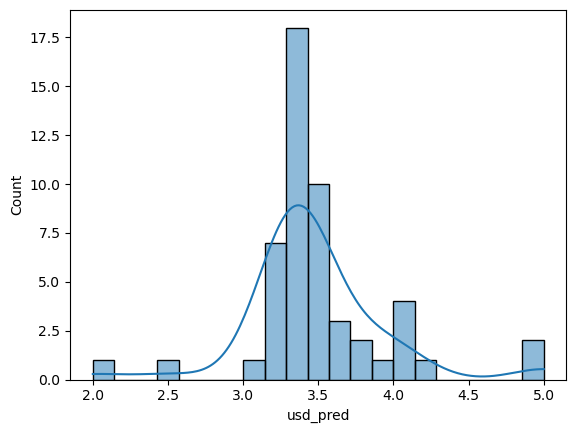

In [90]:
sns.histplot(x=data['usd_pred'], kde=True)
plt.show()

In [91]:
calc_stat(data['usd_pred'])

count       51.000000
mean         3.478459
std          0.468136
min          2.000000
25%          3.300000
50%          3.400000
75%          3.575000
max          5.000000
median       3.400000
mode         3.300000
IQR          0.275000
skewness     0.741565
kurtosis     4.853765
Name: usd_pred, dtype: float64

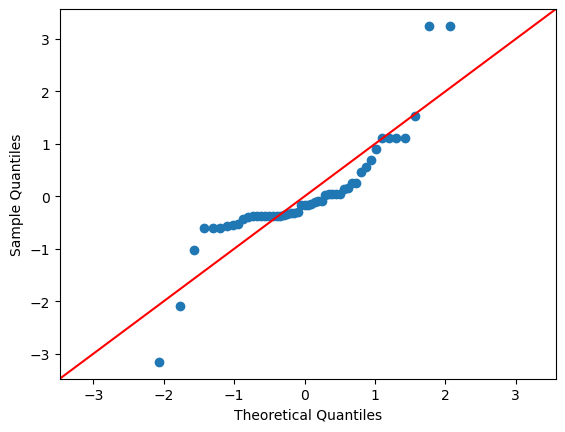

In [92]:
import statsmodels.api as sm 
import pylab as py  

sm.qqplot((data['usd_pred'] - data['usd_pred'].mean())/data['usd_pred'].std(), line ='45') 
py.show() 

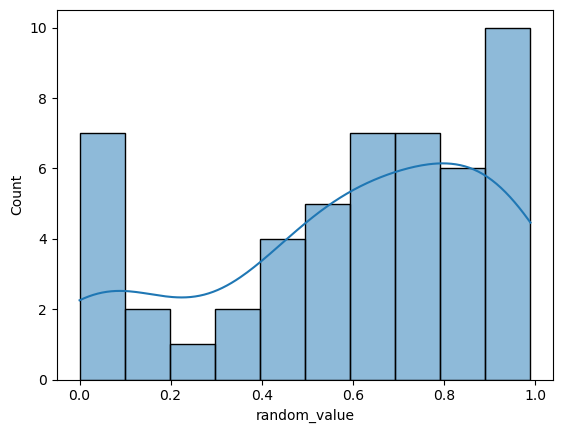

In [93]:
sns.histplot(x=data['random_value'], bins=10, kde=True)
plt.show()

In [94]:
calc_stat(data['random_value'])

count       51.000000
mean         0.600816
std          0.314528
min          0.000000
25%          0.450000
50%          0.640000
75%          0.880000
max          0.990000
median       0.640000
mode         0.880000
IQR          0.430000
skewness    -0.632928
kurtosis    -0.736194
Name: random_value, dtype: float64

In [107]:
data['visited'] = data['visit_freq'] > 5
visited = data['visited'].sum()
total = len(data)
visit_ratio = visited / total
visit_ratio

0.7058823529411765

In [108]:
working = data['work_status'].str.contains('Да').sum()
total = len(data)
working_ratio = working / total
working_ratio

0.5882352941176471

In [116]:
# Задание 3: Биномиальный тест
# Гипотезы:
# H₀: Статус работы (работает/не работает) не влияет на частоту посещения пар.
# H₀: Пол (мужчина/женщина) не влияет на частоту посещения пар.

# Задание 4: t-критерий Стьюдента
# Гипотезы:
# H₀: Статус работы (работает/не работает) не влияет на прогноз курса доллара.
# H₀: Пол (мужчина/женщина) не влияет на прогноз курса доллара.

# Гипотеза 1 для задания 3: влияние work_status на посещаемость
working_successes = data[data['work_status'] != 'Нет']['visit_binary']
not_working_successes = data[data['work_status'] == 'Нет']['visit_binary']

# Биномиальный тест для work_status
binom_p_value_work_status = binomtest(
    working_successes.sum() + not_working_successes.sum(),
    len(working_successes) + len(not_working_successes),
    (working_successes.mean() + not_working_successes.mean()) / 2,
    alternative='two-sided'
)

# Гипотеза 2 для задания 3: влияние пола (sex) на посещаемость
male_successes = data[data['sex'] == 'М']['visit_binary']
female_successes = data[data['sex'] == 'Ж']['visit_binary']

# Биномиальный тест для пола
binom_p_value_sex = binomtest(
    male_successes.sum() + female_successes.sum(),
    len(male_successes) + len(female_successes),
    (male_successes.mean() + female_successes.mean()) / 2,
    alternative='two-sided'
)

# Гипотеза 1 для задания 4: влияние work_status на прогноз курса доллара
usd_working = data[data['work_status'] != 'Нет']['usd_pred']
usd_not_working = data[data['work_status'] == 'Нет']['usd_pred']

t_stat_work_status, t_p_value_work_status = ttest_ind(usd_working, usd_not_working, equal_var=False)

# Гипотеза 2 для задания 4: влияние пола (sex) на прогноз курса доллара
usd_male = data[data['group'] == 12]['usd_pred']
usd_female = data[data['sex'] == 'Ж']['usd_pred']

t_stat_sex, t_p_value_sex = ttest_ind(usd_male, usd_female, equal_var=False)

# Результаты
{
    "Binomial Test Work Status": binom_p_value_work_status,
    "Binomial Test Sex": binom_p_value_sex,
    "T-Test Work Status": (t_stat_work_status, t_p_value_work_status),
    "T-Test Sex": (t_stat_sex, t_p_value_sex)
}

{'Binomial Test Work Status': BinomTestResult(k=22, n=51, alternative='two-sided', statistic=0.43137254901960786, pvalue=0.5772343417096205),
 'Binomial Test Sex': BinomTestResult(k=22, n=51, alternative='two-sided', statistic=0.43137254901960786, pvalue=0.888474120331844),
 'T-Test Work Status': (0.7689401358669081, 0.4464707595804217),
 'T-Test Sex': (0.4721717376568296, 0.6410511418605271)}

In [117]:
# Задание 3.
# Гипотеза: Статус работы (работает/не работает) не влияет на частоту посещения пар.
# p-value = 0.577.
# Это больше 0.05, поэтому не отвергаем H_0
# Вывод: Статус работы не влияет на частоту посещаемости.

# Гипотеза: Пол (мужчина/женщина) не влияет на частоту посещения пар.
# p-value = 0.888.
# Это больше 0.05, поэтому не отвергаем H_0
# Вывод: Пол не влияет на частоту посещаемости.

In [118]:
# Задание 4.

# Гипотеза: Статус работы (работает/не работает) не влияет на прогноз курса доллара.
# t-статистика = 0.769, p-value = 0.446.
# Это больше 0.05, поэтому не отвергаем H_0
# Вывод: Статус работы не влияет на прогноз курса доллара.

# Гипотеза: Пол (мужчина/женщина) не влияет на прогноз курса доллара.

# t-статистика = 0.472, p-value = 0.641.
# Это больше 0.05, поэтому не отвергаем H_0
# Вывод: Пол не влияет на прогноз курса доллара.